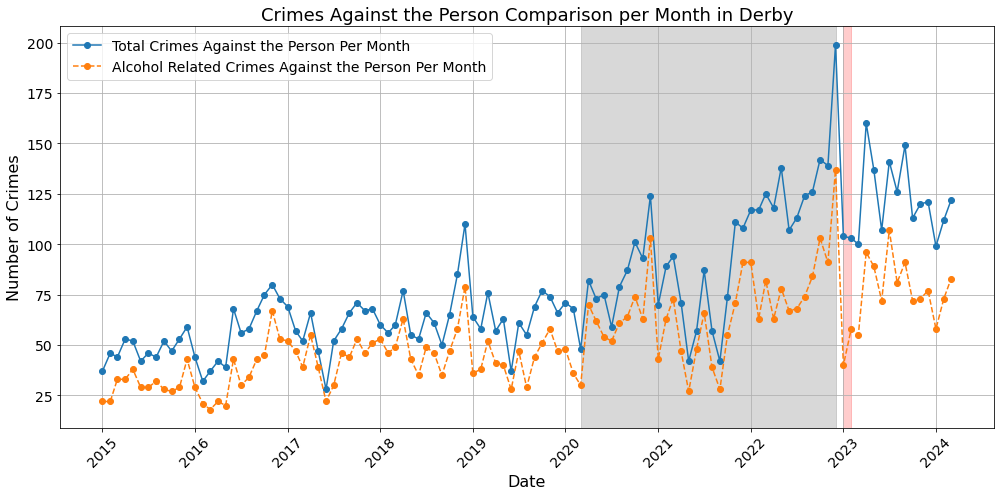

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

file_path = 'updated_data.csv'
data = pd.read_csv(file_path)

data['Reported Date'] = pd.to_datetime(data['Reported Date'], dayfirst=True)
data['Occurred Date'] = pd.to_datetime(data['Occurred Date'], dayfirst=True)

data = data[data['Occurred Date'] < "2024-04-01"]
data = data[data['Offence Group 4'] == 'Selected Offences Against the Person']

district = "Derby"

district_data = data[data['Sub-District'].str.contains(district, case=False, na=False)]
district_alcohol_related = district_data[district_data['Alcohol Flag'] == 'Y']

pre_restriction_alcohol = district_alcohol_related[district_alcohol_related['Occurred Date'] < "2020-03-01"]
during_restriction_alcohol = district_alcohol_related[(district_alcohol_related['Occurred Date'] >= "2020-03-01") & (district_alcohol_related['Occurred Date'] <= "2022-12-05")]

monthly_alcohol_pre = pre_restriction_alcohol.groupby(pre_restriction_alcohol['Occurred Date'].dt.to_period("M")).size()
monthly_alcohol_during = during_restriction_alcohol.groupby(during_restriction_alcohol['Occurred Date'].dt.to_period("M")).size()

monthly_alcohol_pre.index = monthly_alcohol_pre.index.to_timestamp()
monthly_alcohol_during.index = monthly_alcohol_during.index.to_timestamp()

month_to_month_change_alcohol_pre = monthly_alcohol_pre.pct_change() * 100
month_to_month_change_alcohol_during = monthly_alcohol_during.pct_change() * 100

average_month_to_month_change_alcohol_pre = month_to_month_change_alcohol_pre.mean()
average_month_to_month_change_alcohol_during = month_to_month_change_alcohol_during.mean()

monthly_all_crimes = district_data.groupby(district_data['Occurred Date'].dt.to_period("M")).size().to_timestamp()
monthly_alcohol_crimes = district_alcohol_related.groupby(district_alcohol_related['Occurred Date'].dt.to_period("M")).size().to_timestamp()

pre_restriction_district = district_data[district_data['Occurred Date'] < "2020-03-01"]
during_restriction_district = district_data[(district_data['Occurred Date'] >= "2020-03-01") & (district_data['Occurred Date'] <= "2022-12-05")]

monthly_pre = pre_restriction_district.groupby(pre_restriction_district['Occurred Date'].dt.to_period("M")).size()
monthly_during = during_restriction_district.groupby(during_restriction_district['Occurred Date'].dt.to_period("M")).size()

monthly_pre.index = monthly_pre.index.to_timestamp()
monthly_during.index = monthly_during.index.to_timestamp()

common_months = monthly_pre.index.intersection(monthly_during.index)
monthly_pre_common = monthly_pre[common_months]
monthly_during_common = monthly_during[common_months]

percentage_change = ((monthly_during_common - monthly_pre_common) / monthly_pre_common) * 100
average_percentage_change = percentage_change.mean()

month_to_month_change_pre = monthly_pre.pct_change() * 100
month_to_month_change_during = monthly_during.pct_change() * 100

average_month_to_month_change_pre = month_to_month_change_pre.mean()
average_month_to_month_change_during = month_to_month_change_during.mean()

plt.figure(figsize=(14, 7))
plt.plot(monthly_all_crimes.index, monthly_all_crimes.values, marker='o', label='Total Crimes Against the Person Per Month')
plt.plot(monthly_alcohol_crimes.index, monthly_alcohol_crimes.values, marker='o', label='Alcohol Related Crimes Against the Person Per Month', linestyle='--')

plt.axvspan('2020-03-01', '2022-12-01', color='gray', alpha=0.3)
if district == 'Derby':
    plt.axvspan('2023-01-01', '2023-02-01', color='red', alpha=0.2)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title(f'Crimes Against the Person Comparison per Month in {district}', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Crimes', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


In [16]:
average_month_to_month_change_pre, average_month_to_month_change_during


(3.793496350282247, 4.715969504861593)

In [17]:
average_month_to_month_change_alcohol_pre, average_month_to_month_change_alcohol_during

(5.137717744385477, 7.95424515514428)